# Core

> Fill in a module description here

In [1]:
#| default_exp core

In [2]:
#| hide
from nbdev.showdoc import *

In [3]:
#| export
class Data:
    """
    A class for fetching various datasets.
    """

    RAW_KINASE_URL = "https://github.com/sky1ove/tools/raw/main/dataset/antibiotics_2335.csv"

    def __init__(self):
        pass
    
    @staticmethod
    def get_kinase_raw():
        """
        Fetches the deduplicated dataset from the cell paper: 
        A Deep Learning Approach to Antibiotic Discovery.
        """
        df = pd.read_csv(Data.RAW_KINASE_URL)
        return df

Raw data looks like below

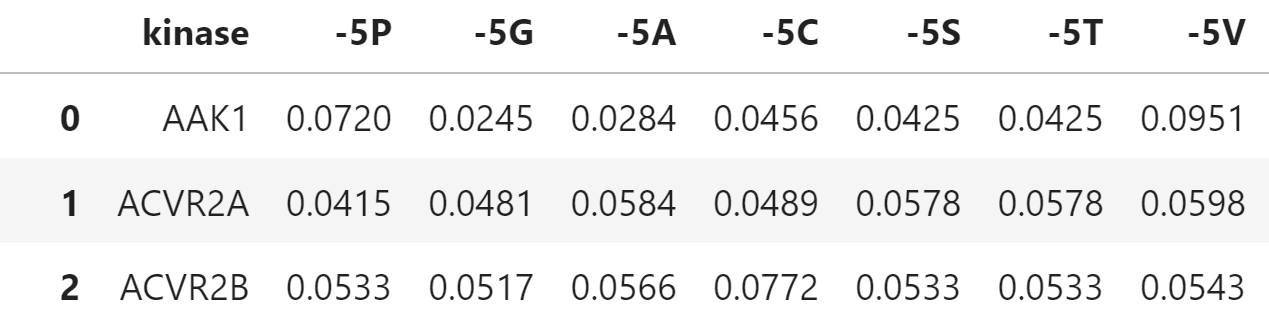

In [4]:
#| export
def raw2kinase(df, #dataframe is from the paper's raw data; each raw contains a kinase info at all postiions
               kinase, # a specific kinase you'd like to extract to make a pivot table (position as index, a.a. as columns)
              ):
    df = df.set_index('kinase')
    p = pd.DataFrame(df.loc[kinase],columns = [kinase]).reset_index().rename(columns={'index':'substrate'})
    p['position'] = p.substrate.str.extract('(-?\d+)')
    p['aa'] = p.substrate.str[-1]
    p.position = p.position.astype(int)
    pp = p.pivot(index='position', columns='aa', values=kinase)
    pp = pp.drop(columns=['s'])
    return pp

In [5]:
show_doc(raw2kinase)

---

### raw2kinase

>      raw2kinase (df, kinase)

|    | **Details** |
| -- | ----------- |
| df | dataframe is from the paper's raw data; each raw contains a kinase info at all postiions |
| kinase | a specific kinase you'd like to extract to make a pivot table (position as index, a.a. as columns) |

Get specific kinase in pivot

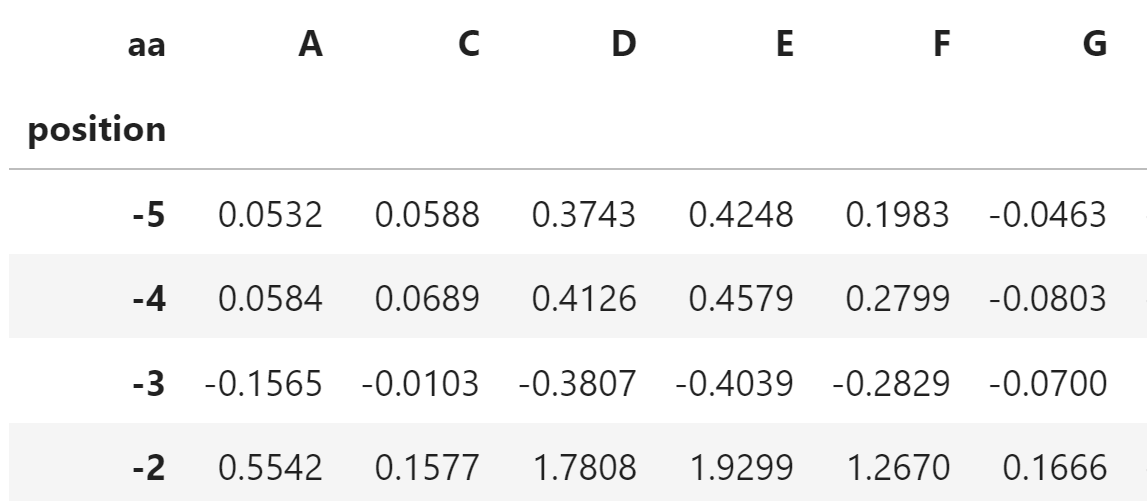

In [6]:
#| export
def normalize(df, #a single kinase's df that has position as index, and a.a. as columns
              PDHK=False, #whether this kinase belongs to PDHK family
             ):
    columns_to_exclude = ['S', 'T', 'C', 't', 'y']
    
    if PDHK:
        columns_to_exclude.append('Y')
        divisor = 16
    else:
        divisor = 17
    
    s = df.drop(columns=columns_to_exclude).sum(1)
    df2 = df.div(s, axis=0)
    df2.C = df2.C / (df2.C.median() * divisor)
    df2['S'] = df2.drop(columns=columns_to_exclude).median(1)
    df2['T'] = df2.drop(columns=columns_to_exclude).median(1)
    df2 = round(df2, 4)
    
    return df2

In [7]:
show_doc(normalize)

---

### normalize

>      normalize (df, PDHK=False)

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df |  |  | a single kinase's df that has position as index, and a.a. as columns |
| PDHK | bool | False | whether this kinase belongs to PDHK family |

In [8]:
# To expand, can use pr2.unstack().reset_index()

In [9]:
#| hide
import nbdev; nbdev.nbdev_export()